# import dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option("display.max_columns", None)


In [5]:
sns.set_style("whitegrid")

In [6]:
df = pd.read_csv("E:\German Credit Risk\german_credit_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\yash kevadiya\AppData\Local\Temp\ipykernel_25716\1476211277.py:1: SyntaxWarning: invalid escape sequence '\G'
  df = pd.read_csv("E:\German Credit Risk\german_credit_data.csv")


In [7]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [8]:
df.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [9]:
df['Age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [10]:
good_stats = df.loc[df['Risk'] == 'good',['Age','Job','Credit amount']].describe()

In [11]:
bad_stats = df.loc[df['Risk'] == 'bad',['Age','Job','Credit amount']].describe()

In [12]:
good_mean = good_stats.loc['mean']
bad_mean = bad_stats.loc['mean']

In [13]:
compare_df = pd.DataFrame({
    'Good Risk':good_mean,
    'Bad Risk':bad_mean
})

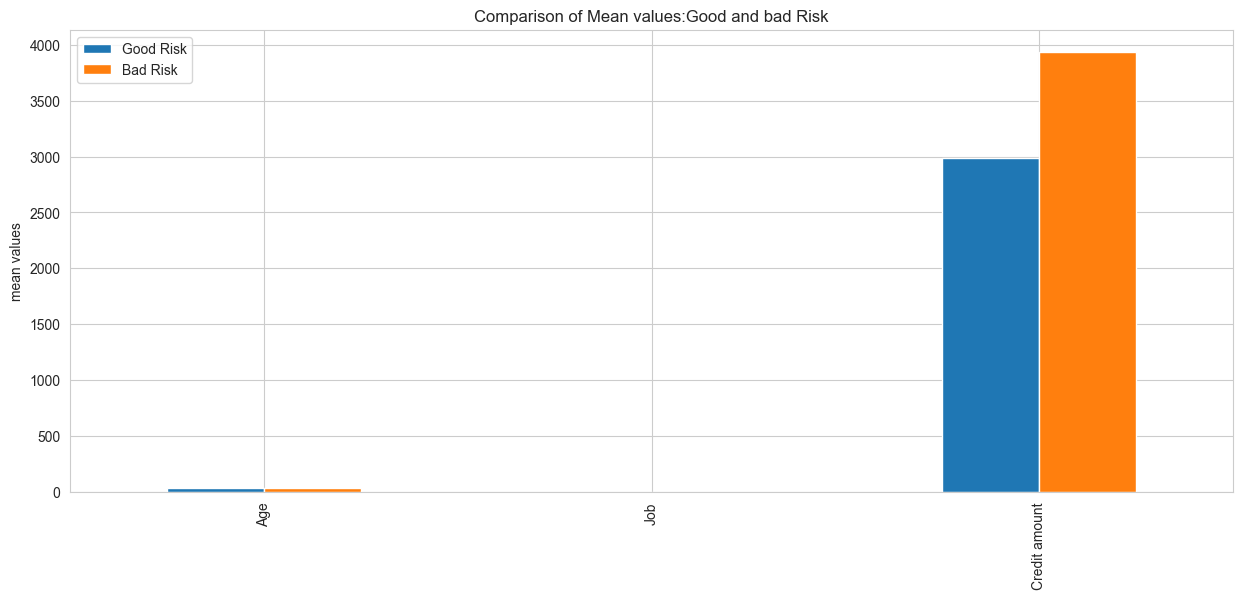

In [16]:
compare_df.plot(kind='bar',figsize=(15,6))
plt.title("Comparison of Mean values:Good and bad Risk")
plt.ylabel("mean values")
plt.show()

In [17]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [19]:
df.duplicated().sum()

np.int64(0)

In [21]:
df = df.dropna().reset_index(drop=True)

In [22]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [24]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [25]:
df.drop(columns='Unnamed: 0',inplace=True)

In [27]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [38]:
int_columns = df.select_dtypes(include=['int64']).columns.tolist()
df_int_columns = pd.DataFrame(int_columns)
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
df_cat_columns = pd.DataFrame(cat_columns)

In [ ]:
print(int_columns)
print(cat_columns)

['Age', 'Job', 'Credit amount', 'Duration']
['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']


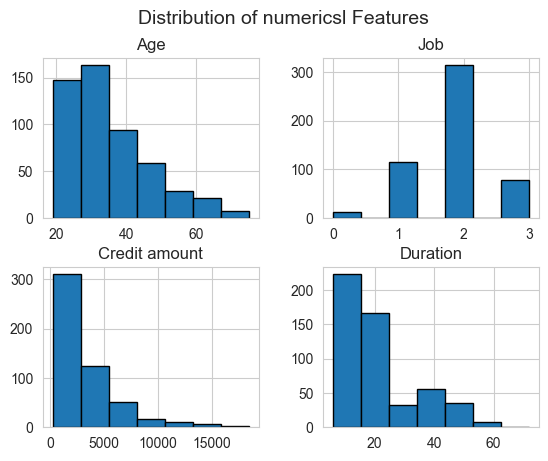

In [52]:

df[['Age', 'Job', 'Credit amount', 'Duration']].hist(bins = 7, edgecolor = "black")
plt.suptitle("Distribution of numericsl Features", fontsize= 14)
plt.show()

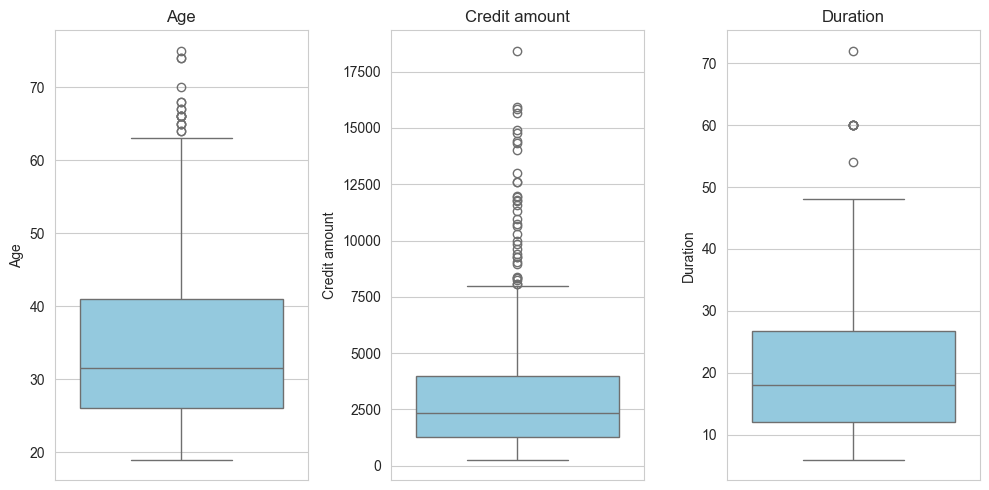

In [57]:
# Display Boxplot for numerical features.
plt.figure(figsize=(10,5))
for i,col in enumerate(['Age', 'Credit amount', 'Duration']):
    plt.subplot(1 , 3, i+1)
    sns.boxplot(y=df[col],color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()

C:\Users\yash kevadiya\AppData\Local\Temp\ipykernel_25716\2773861370.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x =col, palette="Set2", order=df[col].value_counts().index)
C:\Users\yash kevadiya\AppData\Local\Temp\ipykernel_25716\2773861370.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x =col, palette="Set2", order=df[col].value_counts().index)
C:\Users\yash kevadiya\AppData\Local\Temp\ipykernel_25716\2773861370.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x =col, palette="Set2", order=d

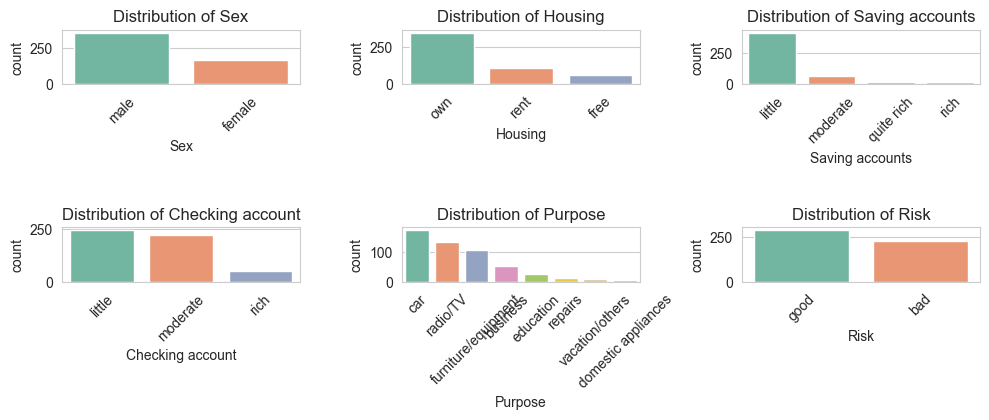

In [ ]:
plt.figure(figsize=(10,10))
for i, col in enumerate(cat_columns):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x =col, palette="Set2", order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation =45)

plt.tight_layout()
plt.show()

In [71]:
corr = df[['Age', 'Job', 'Credit amount', 'Duration']].corr()

In [72]:

corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


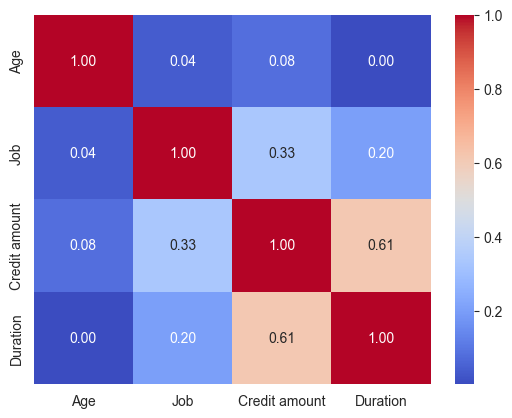

In [73]:
sns.heatmap(corr, annot=True, cmap = 'coolwarm',fmt=".2f")
plt.show()

In [74]:
df.groupby("Job")['Credit amount'].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [75]:
df.groupby('Sex')["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [77]:
pd.pivot_table(df, values='Credit amount' ,index= "Housing", columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


In [ ]:
sns.scatterplot(data =df, x = "Age", y ="Credit amount",hue="Sex", size='Duration', alpha=0.7, palette=0.7)

NameError: name 'sns' is not defined